https://data.cityofnewyork.us/Public-Safety/FDNY-Line-Of-Duty-Deaths/32y8-s55c

We decided to use the open source data of FDNY firefighters death while on the line of duty the date starts from August 24, 1865 till September 10, 2018. This data set covers the names of the fallen firefighters who died protecting NYC from fire all across the boroughs. It also includes the rank of the service members as well as they’re unit and date of death. With this data set we plan to analyze this type of brave work and what the average ranking of death is among NYC firefighters. Fire fighters  -link to the data set . We used the importation of the PANDAS library to export csv files into data frames and structures. From here we see columns and rows of information. this can show how many entries we have as well as what type of information is being cataloged. In our data set we are able to see which units of firefighters have the most death and what period of time did the death of firefighter spike up and down. We can also analyze what rank of firefighters contain the most death

This is where we imported the pandas libaray,so we can read the csv file and covert it into a data frame for easier manupliation, as well as matplotlib so we can create bargraphs and histgraphs with the data we collect 

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

this is where what we do to make sure our csv file are ready to be read.

In [154]:
ls

C++/
C++ labs/
CU_R1096A.pdf
Call of Duty Modern Warfare 3.app/
ChristieNassauTranscript.pdf
Computer Programmers _ Occupational Outlook Handbook_ _ U.S. Bureau of Labor Statistics_files/
Discrete math projects/
Epic Games Launcher
Erick Molina Resume 1 (1).pdf
Erick Molina.docx
FDNY_Line_Of_Duty_Deaths.csv
Flora Code ana.jpeg
Google Chrome.app/
Project1.ipynb
Untitled-Copy1.ipynb
Untitled.ipynb
boolean condition indexing (1).ipynb
c++ hw#1.docx
c++ hw#2.docx
c++ hw#3.docx
c++hw 5.docx
computer science hw#6.docx
em resume.PDF
final resume.pdf
javaforosx.dmg
lab 1.docx
project#1.ipynb
punta cana animal /
python-3.7.4-macosx10.9.pkg
scape park/
snuba/
transcript.pdf
~$ick Molina.docx


saving the name of the data frame as well as pulling up the data frame itself 

In [155]:
fire=pd.read_csv('FDNY_Line_Of_Duty_Deaths.csv')

In [156]:
fire

,Rank,Name,Unit,Date
0,FIREFIGHTER,ROBERT WINTRINGHAM,ENGINE 1,"AUGUST 24, 1865"
1,FIREFIGHTER,GEORGE BELL,ENGINE 8,"NOVEMBER 8, 1865"
2,FIREFIGHTER,THOMAS IRVIN,ENGINE 4,"DECEMBER 2, 1865"
3,FIREFIGHTER,DOMINICK SICOT,ENGINE 4,"DECEMBER 14, 1865"
4,FIREFIGHTER,PETER H. WALSH,ENGINE 5,"MAY 21, 1866"
...,...,...,...,...
1164,LIEUTENANT,JOHN H. MARTINSON,ENGINE 249,"Thursday, January 3, 2008"
1165,FIREFIGHTER,JAMEL M. SEARS,BOT,"Tuesday, November 11, 2008"
1166,LIEUTENANT,"ROBERT J. RYAN, JR.",ENGINE 155,"Sunday, November 23, 2008"
1167,FIREFIGHTER,PAUL WARHOLA,ENGINE 221,"Friday, August 14, 2009"


this is the function we created to string splice the last 4 digits of the data aka the 'years'

In [157]:
def last_four(s):
    return s[-4:]

us applying the function to the column 'data' to do some clean up the data 

In [158]:
fire['year']=fire['Date'].apply(last_four)

In [159]:
fire.head()

,Rank,Name,Unit,Date,year
0,FIREFIGHTER,ROBERT WINTRINGHAM,ENGINE 1,"AUGUST 24, 1865",1865
1,FIREFIGHTER,GEORGE BELL,ENGINE 8,"NOVEMBER 8, 1865",1865
2,FIREFIGHTER,THOMAS IRVIN,ENGINE 4,"DECEMBER 2, 1865",1865
3,FIREFIGHTER,DOMINICK SICOT,ENGINE 4,"DECEMBER 14, 1865",1865
4,FIREFIGHTER,PETER H. WALSH,ENGINE 5,"MAY 21, 1866",1866


In [160]:
fire.tail()

,Rank,Name,Unit,Date,year
1164,LIEUTENANT,JOHN H. MARTINSON,ENGINE 249,"Thursday, January 3, 2008",2008
1165,FIREFIGHTER,JAMEL M. SEARS,BOT,"Tuesday, November 11, 2008",2008
1166,LIEUTENANT,"ROBERT J. RYAN, JR.",ENGINE 155,"Sunday, November 23, 2008",2008
1167,FIREFIGHTER,PAUL WARHOLA,ENGINE 221,"Friday, August 14, 2009",2009
1168,LIEUTENANT,RICHARD A. NAPPI,ENGINE 237,"Monday, April 16, 2012",2012


look the all the column entires and what type of info pandas is reading it in

In [161]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 5 columns):
Rank    1169 non-null object
Name    1169 non-null object
Unit    1169 non-null object
Date    1169 non-null object
year    1169 non-null object
dtypes: object(5)
memory usage: 45.8+ KB


In [162]:
fire.index

RangeIndex(start=0, stop=1169, step=1)

this is us converting the new column 'year' we made into numeric

In [163]:
fire['year']=pd.to_numeric(fire['year'])

more clean up this is us using a function to string split the column data to get rid of the redundent years

In [164]:
def first(s):
    return s.split(sep=',')[0]

applying that said function 

In [165]:
fire['Date'] = fire['Date'].apply(first)

In [166]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 5 columns):
Rank    1169 non-null object
Name    1169 non-null object
Unit    1169 non-null object
Date    1169 non-null object
year    1169 non-null int64
dtypes: int64(1), object(4)
memory usage: 45.8+ KB


the final state of the data frame were gonna use 

In [167]:
fire

,Rank,Name,Unit,Date,year
0,FIREFIGHTER,ROBERT WINTRINGHAM,ENGINE 1,AUGUST 24,1865
1,FIREFIGHTER,GEORGE BELL,ENGINE 8,NOVEMBER 8,1865
2,FIREFIGHTER,THOMAS IRVIN,ENGINE 4,DECEMBER 2,1865
3,FIREFIGHTER,DOMINICK SICOT,ENGINE 4,DECEMBER 14,1865
4,FIREFIGHTER,PETER H. WALSH,ENGINE 5,MAY 21,1866
...,...,...,...,...,...
1164,LIEUTENANT,JOHN H. MARTINSON,ENGINE 249,Thursday,2008
1165,FIREFIGHTER,JAMEL M. SEARS,BOT,Tuesday,2008
1166,LIEUTENANT,"ROBERT J. RYAN, JR.",ENGINE 155,Sunday,2008
1167,FIREFIGHTER,PAUL WARHOLA,ENGINE 221,Friday,2009


creating a line graph of the deaths of firefighter with X as years and Y and the number of deaths

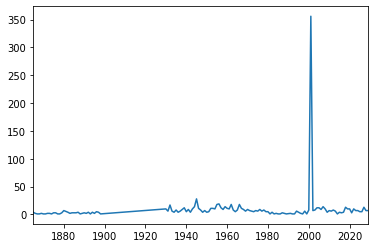

In [168]:
fire['year'].value_counts().sort_index().plot()

this is the before graph but without the outlier of 9/11/2011 

(1880, 1980)

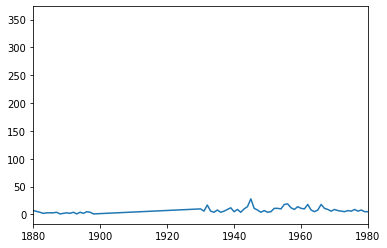

In [169]:
fire['year'].value_counts().sort_index().plot()
plt.xlim([1880,1980])

this is the sorting the data from the column rank 

this high spikes in the years are correlating with great fires in nyc 

In [170]:
top_unit=fire['Unit'].value_counts()

(0, 20)

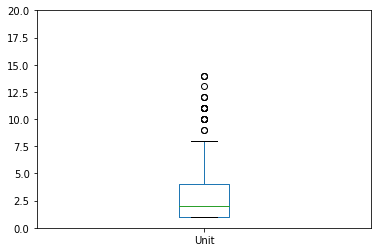

In [171]:
top_unit.plot.box()
plt.ylim([0,20])

what is the mean of deaths of all units of firefighters

In [172]:
top_unit.mean()

2.9594936708860757

ploting a bar graph of the most deaths from least 

(0, 30)

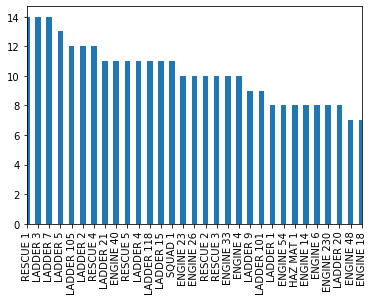

In [173]:
top_unit.plot.bar()
plt.xlim([0,30])


ploting a bar graph of the most deaths from least 

(31, 60)

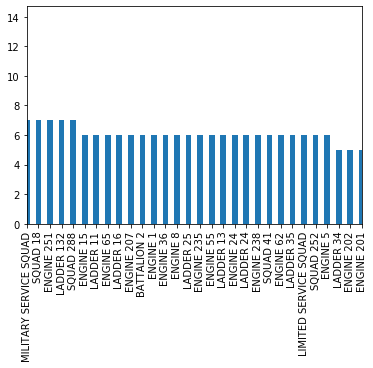

In [174]:
top_unit.plot.bar()
plt.xlim([31,60])

FDNY Rescue 1 is number one of the list and it shoud make sense they are located at 530 W 43rd St, New York, NY 10036 and one of the first responders to 911 and they lost half theyre unit during the attack

this is us sorting the data of how many death each rank of fighterfighter has

In [175]:
rank1=fire['Rank'].value_counts().sort_index()

ploting a barh graph to compare that data 

(0, 500)

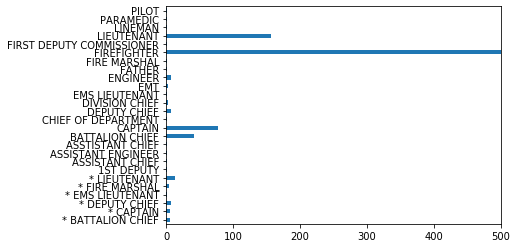

In [176]:
rank1.plot.barh()
plt.xlim(0,500)

how many capatin died in the data

In [177]:
captain=fire['Rank']=='CAPTAIN'

In [178]:
captain.sum()

77

how many firefighters died in the data

In [179]:
ff=fire['Rank']=='FIREFIGHTER'

In [180]:
ff.sum()


820

In [213]:
d=fire['Date'].value_counts()

(0, 6)

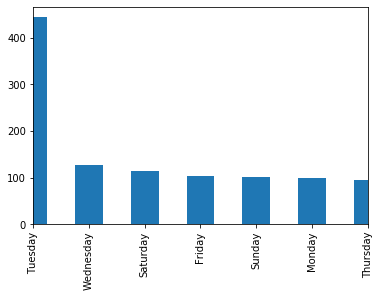

In [218]:
d.plot.bar()
plt.xlim([0,6])


this is a bar graph of which day outta the week most deaths occured. Tuesday is the outlier here due to it being a tuesday on september 11, the next following day would be wednesday. 

In [221]:
fire['Name'].value_counts()

JOHN J. FINLEY         2
MICHAEL LYNCH          2
PATRICK O'KEEFE        2
MICHAEL ROBERTS        2
JOHN J. SCHOPPMEYER    1
                      ..
JOHN DEGNAN            1
WILLIAM CARLOCK        1
CARL BEDIGIAN          1
LEO J. J. RAY          1
JOHN V. STORCH JR.,    1
Name: Name, Length: 1165, dtype: int64

In, “FDNY - line of duty deaths” open data has five columns about rank , name , unit , date and year as well as 1169 rows. In the outlier , we can see the deaths range from year 1880 to 2020 and we can see a tremendous deaths jump in 2001. Also there is a steady up and down in from 1880 to 1980. The graph also shows the average of the top unit which is 2.9594.
The graph briefly shows, what level of fire fighter has most deaths. The Rescue 1 firefighters , ladder 3 , ladder 7 faces most death. Moreover , position like Engine 48 and Engine 18 faces less death in the unit. FDNY Rescue 1 is number one of the list and it should make sense they are located at 530 W 43rd St, New York, NY 10036 and one of the first responders to 911 and they lost half their unit during the attack. We have showed the data of how many death each rank of the firefighter has. Lieutenant , Engineer , deputy chief , fire marshal , captain , battalion chief  face less than the actual firefighters. With the help of data we were able to find out that about 820 firefighters faced death during their duty.
